# Emotion Recognition
## CS 4662: Advanced Machine Learning and Deep Learning
## Bryan Bee, Paul El-Hosni, Edward Eckle, Jacky Man, Melissa Hernandez

In [67]:
# import required libraries
import numpy as np
import pandas as pd
import keras

# 1 Data Preprocessing

In [68]:
import os 

train = ["train"]
emotions = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]

for train_folder in train:
    count = 0

    # iterate through each emotion folder containing images
    for emot in emotions:
        path = f'./{train_folder}/{emot}'
        
        # count the number of files inside the folder
        file_count = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
        count += file_count
        print(f'  {emot}: {file_count}')

    print(f'files in {train_folder}: {count}')
    print()

  angry: 3995
  disgusted: 436
  fearful: 4097
  happy: 7215
  neutral: 4965
  sad: 4830
  surprised: 3171
files in train: 28709


In [69]:
# constants about our data
TRAIN_SIZE = 28709
IMAGE_LENGTH = 48

DATASET_SIZE = TRAIN_SIZE
IMAGE_PIXELS = IMAGE_LENGTH ** 2

In [70]:
import matplotlib.image as mpimg

# these are the directories that we read from
test_train = ["train"]
emotions = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]

# initialize empty arrays; data for the pixels and different labels
data = np.empty((DATASET_SIZE, IMAGE_PIXELS))
tt_labels = np.empty(DATASET_SIZE, dtype=object)
emotion_labels = np.empty(DATASET_SIZE, dtype=object)

i = 0
for tt in test_train:
    for emotion in emotions:
        # iterate through all the folders
        directory = f'./{tt}/{emotion}'
        
        for filename in os.listdir(directory):
            fpath = os.path.join(directory, filename)
            
            # flatten the image into 1d and save it to our numpy data array
            data[i] = mpimg.imread(fpath).flatten() 

            emotion_labels[i] = emotion
            i += 1

In [71]:
data

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.41568628, 0.42745098,
        0.32156864],
       [0.59215689, 0.58823532, 0.57647061, ..., 0.75686276, 0.71764708,
        0.72156864],
       [0.45882353, 0.45490196, 0.44313726, ..., 0.18039216, 0.18431373,
        0.19215687],
       ...,
       [0.03921569, 0.0627451 , 0.07450981, ..., 0.68235296, 0.62352943,
        0.57647061],
       [0.5529412 , 0.58039218, 0.61176473, ..., 0.86666667, 0.85490197,
        0.85490197],
       [0.47058824, 0.47058824, 0.48627451, ..., 0.72549021, 0.70588237,
        0.71764708]])

In [72]:
from sklearn import preprocessing

# normalize/scale the data
data = preprocessing.scale(data)
data

array([[-0.6098823 , -0.45922178, -0.40324931, ..., -0.08629622,
        -0.05737478, -0.41127694],
       [ 0.37236206,  0.40461636,  0.41101772, ...,  1.03874271,
         0.89140539,  0.88666894],
       [-0.0399381 , -0.01496221, -0.01490662, ..., -0.86218512,
        -0.85229867, -0.83120063],
       ...,
       [-1.33747072, -1.24901664, -1.19246195, ...,  0.79304457,
         0.58369294,  0.41584547],
       [ 0.25109733,  0.37993528,  0.52376237, ...,  1.40082418,
         1.34015273,  1.31931754],
       [-0.00355868,  0.03439996,  0.1228924 , ...,  0.93529086,
         0.85294134,  0.87394398]])

In [73]:
# compile the numpy arrays into a dataframe
df = pd.DataFrame(data=data)
df['emotion'] = emotion_labels

In [74]:
train = df
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
0,-0.609882,-0.459222,-0.403249,-0.507367,-0.672987,-0.666437,-0.641287,-0.610882,-0.759125,-0.734837,...,1.008915,1.011680,0.352092,-0.062565,0.067986,-0.216423,-0.086296,-0.057375,-0.411277,angry
1,0.372362,0.404616,0.411018,0.553296,0.503082,0.337040,0.055831,0.464802,0.889874,0.936669,...,-0.029926,-0.206637,-0.029433,-0.116214,-0.581221,0.778775,1.038743,0.891405,0.886669,angry
2,-0.039938,-0.014962,-0.014907,-0.162332,-0.411638,-0.733335,-0.955673,-1.016010,-1.057651,-1.109485,...,-1.068767,-0.968085,-0.915116,-0.907534,-0.859452,-0.858063,-0.862185,-0.852299,-0.831201,angry
3,0.469374,0.515681,0.385963,0.604412,0.751363,0.711671,0.807625,0.758170,0.889874,1.138403,...,-0.366848,-0.220482,0.052322,0.192266,0.293221,0.320460,0.353374,0.429837,0.161346,angry
4,1.621389,1.688033,1.751426,1.792866,1.639948,1.046163,0.575252,0.688321,-0.403737,-0.922161,...,1.514297,0.347143,-0.111188,-0.116214,0.346217,0.582354,0.456826,0.032375,-0.054978,angry


In [75]:
# 2. Data Preprocessing
# Separate features and labels on our datasets 
feature_cols = [x for x in range(48*48)]

X =  train[feature_cols]
y = train["emotion"]

In [76]:
y

0            angry
1            angry
2            angry
3            angry
4            angry
           ...    
28704    surprised
28705    surprised
28706    surprised
28707    surprised
28708    surprised
Name: emotion, Length: 28709, dtype: object

In [77]:
from sklearn.model_selection import train_test_split

SVM_X_train, SVM_X_test, SVM_y_train, SVM_y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [78]:
print(SVM_y_train.shape)
print(SVM_X_train.shape)

(22967,)
(22967, 2304)


In [79]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have your labels as a list or array
labels = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit the encoder on the labels
encoder.fit(y)

# Transform the labels to numerical representations
y_encoded = encoder.transform(y)

encoded_y_df = pd.DataFrame({'emotion': y_encoded})

encoded_y_df

,emotion
0,0
1,0
2,0
3,0
4,0
...,...
28704,6
28705,6
28706,6
28707,6


In [80]:

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y_df, test_size=0.3, random_state=2)

X_train_3D = X_train.values.reshape(20096, 48, 48, 1)
X_test_3D = X_test.values.reshape(8613, 48, 48, 1)

print(X_train_3D.shape)
print(X_test_3D.shape)

(20096, 48, 48, 1)
(8613, 48, 48, 1)


In [81]:
from keras import utils as np_utils

# OneHotEncoding for the output label:

y_train_cat = np_utils.to_categorical(y_train, 7)
y_test_cat = np_utils.to_categorical(y_test, 7)

# Label after OneHotEncoding:
print (y_train_cat.shape)
print (y_train_cat[:10, :])

(20096, 7)
[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


# 2.1 ANN

In [82]:
# "Sequential" models let us define a stack of neural network layers
from keras import Sequential
# import the core layers:
from keras.layers import Dense, Dropout, Activation, Flatten


input_size = 2304
hidden_neurons = 500
out_size = 7

ANN_model = Sequential()

# first layer: input layer
# Input layer does not do any processing, so no need to define the input layer in this problem.

# -----------------------------------------
# second layer: hidden layer:
ANN_model.add(Dense(hidden_neurons, input_dim = input_size))  # Neurons
ANN_model.add(Activation('sigmoid')) # Activation

# -----------------------------------------
# third layer: hidden layer:
ANN_model.add(Dense(hidden_neurons, input_dim = hidden_neurons))  # Neurons
ANN_model.add(Activation('sigmoid')) # Activation

# -----------------------------------------
# fourth layer: hidden layer:
ANN_model.add(Dense(hidden_neurons, input_dim = hidden_neurons))  # Neurons
ANN_model.add(Activation('sigmoid')) # Activation

# -----------------------------------------
# output layer: output layer:
ANN_model.add(Dense(out_size, input_dim = hidden_neurons))  # Neurons
ANN_model.add(Activation('softmax')) # Activation

# compile:
ANN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [83]:
fitted_ANN_model = ANN_model.fit(X_train, y_train_cat, validation_split=0.33, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
421/421 [==============================] - 5s 9ms/step - loss: 1.7147 - accuracy: 0.3157 - val_loss: 1.6719 - val_accuracy: 0.3409
Epoch 2/25
421/421 [==============================] - 4s 9ms/step - loss: 1.6328 - accuracy: 0.3462 - val_loss: 1.6345 - val_accuracy: 0.3405
Epoch 3/25
421/421 [==============================] - 4s 9ms/step - loss: 1.5802 - accuracy: 0.3736 - val_loss: 1.6422 - val_accuracy: 0.3445
Epoch 4/25
421/421 [==============================] - 4s 9ms/step - loss: 1.5295 - accuracy: 0.4026 - val_loss: 1.6157 - val_accuracy: 0.3664
Epoch 5/25
421/421 [==============================] - 4s 9ms/step - loss: 1.4764 - accuracy: 0.4257 - val_loss: 1.5759 - val_accuracy: 0.3804
Epoch 6/25
421/421 [==============================] - 4s 9ms/step - loss: 1.4262 - accuracy: 0.4478 - val_loss: 1.5992 - val_accuracy: 0.3756
Epoch 7/25
421/421 [==============================] - 4s 9ms/step - loss: 1.3685 - accuracy: 0.4716 - val_loss: 1.6314 - val_accuracy: 0.3694
Epoch 

Text(0.5, 1.0, 'ANN Training and Validation Accuracy')

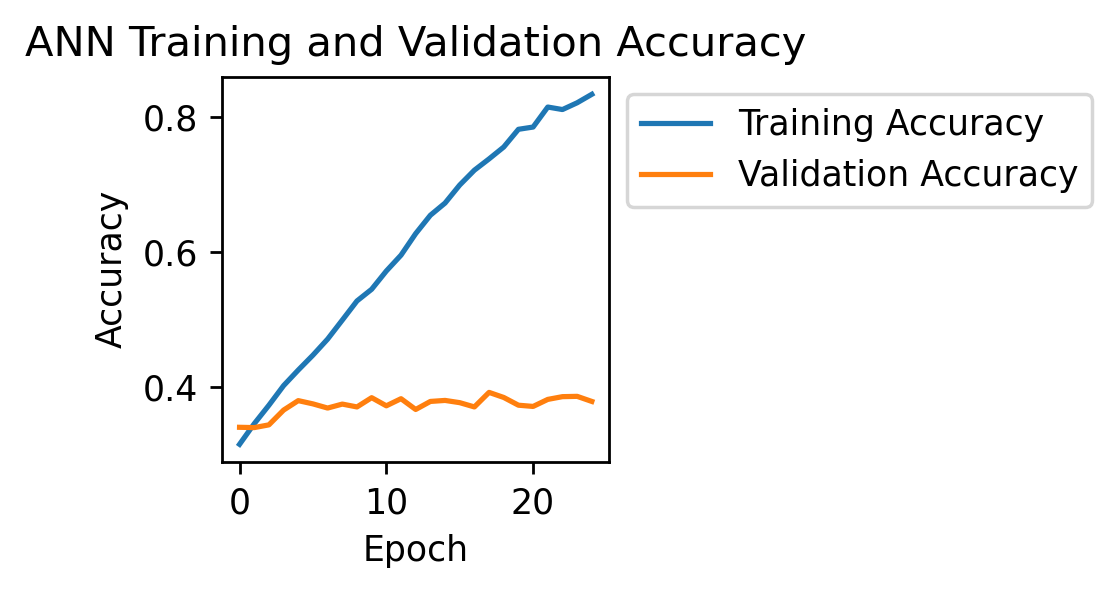

In [84]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(2,2), dpi=250)
plt.plot(fitted_ANN_model.history['accuracy'], label='Training Accuracy')
plt.plot(fitted_ANN_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('ANN Training and Validation Accuracy')

In [85]:
# Prediction:
y_predict = ANN_model.predict(X_test, verbose=1)
print (y_predict.shape)

270/270 [==============================] - 1s 2ms/step
(8613, 7)


In [86]:
# Access the final accuracy from the history object
ANN_train_accuracy = fitted_ANN_model.history['accuracy'][-1]
ANN_val_accuracy = fitted_ANN_model.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {ANN_train_accuracy}")
print(f"Final Validation Accuracy: {ANN_val_accuracy}")

Final Training Accuracy: 0.8341503143310547
Final Validation Accuracy: 0.37922194600105286


# 2.2 Convolution Neural Network (CNN)

In [87]:
import tensorflow as tf

from keras import layers, models
from keras.optimizers import Adam

model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_LENGTH, IMAGE_LENGTH, 1)))

model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(48, activation='relu'))
model_cnn.add(layers.Dense(7)) 

In [88]:
model_cnn.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 flatten_4 (Flatten)         (None, 28224)             0         
                                                                 
 dense_25 (Dense)            (None, 48)                1354800   
                                                                 
 dense_26 (Dense)            (None, 7)                 343       
                                                     

In [89]:
model_cnn.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history_cnn = model_cnn.fit(X_train_3D, y_train, epochs=25,
                            validation_data=(X_test_3D, y_test))

Epoch 1/25
628/628 [==============================] - 11s 17ms/step - loss: 1.5336 - accuracy: 0.4036 - val_loss: 1.4204 - val_accuracy: 0.4522
Epoch 2/25
628/628 [==============================] - 10s 17ms/step - loss: 1.2533 - accuracy: 0.5258 - val_loss: 1.3401 - val_accuracy: 0.4927
Epoch 3/25
628/628 [==============================] - 10s 16ms/step - loss: 1.0126 - accuracy: 0.6219 - val_loss: 1.3532 - val_accuracy: 0.5107
Epoch 4/25
628/628 [==============================] - 10s 16ms/step - loss: 0.7180 - accuracy: 0.7371 - val_loss: 1.5275 - val_accuracy: 0.5056
Epoch 5/25
628/628 [==============================] - 10s 17ms/step - loss: 0.4196 - accuracy: 0.8566 - val_loss: 1.8999 - val_accuracy: 0.4998
Epoch 6/25
628/628 [==============================] - 10s 16ms/step - loss: 0.2194 - accuracy: 0.9325 - val_loss: 2.2751 - val_accuracy: 0.4915
Epoch 7/25
628/628 [==============================] - 10s 16ms/step - loss: 0.1153 - accuracy: 0.9686 - val_loss: 2.9019 - val_accuracy:

In [90]:
# Access the final accuracy from the history object
CNN_train_accuracy = history_cnn.history['accuracy'][-1]
CNN_val_accuracy = history_cnn.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {CNN_train_accuracy}")
print(f"Final Validation Accuracy: {CNN_val_accuracy}")

Final Training Accuracy: 0.9916401505470276
Final Validation Accuracy: 0.4883315861225128


Text(0.5, 1.0, 'CNN Training and Validation Accuracy')

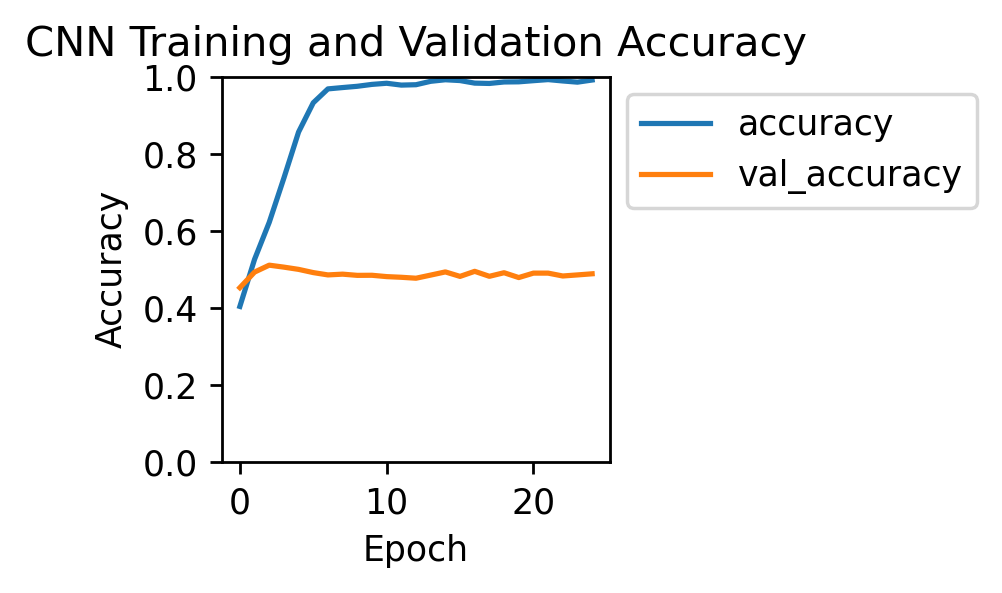

In [91]:
fig = plt.figure(figsize=(2,2), dpi=250)
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('CNN Training and Validation Accuracy')

# 2.3 SVM Model

In [92]:
from  sklearn.decomposition  import  PCA

k = 100
pca = PCA(n_components=k)

# new datasets for after PCA
X_train_pca = pca.fit_transform(SVM_X_train)
X_test_pca = pca.transform(SVM_X_test)

In [93]:
from sklearn.svm import SVC

svm = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)
svm = svm.fit(X_train_pca, SVM_y_train)

In [94]:
y_predict_SVM = svm.predict(X_test_pca)

In [95]:
from sklearn.metrics import accuracy_score
SVM_score = str(accuracy_score(SVM_y_test, y_predict_SVM))
print('Accuracy for SVM: ' + SVM_score)

Accuracy for SVM: 0.4287704632532219


# 2.4 VGG-16 Model

In [96]:
X_train_3D_RGB = []
X_test_3D_RGB = []
# need to resize to use the VGG16 from keras
# since our data is black and white, we copy the pixel values 3 times
for img in X_train_3D:
    X_train_3D_RGB.append(np.repeat(img, 3, axis = -1))
for img in X_test_3D:
    X_test_3D_RGB.append(np.repeat(img, 3, axis = -1))
X_train_3D_RGB = np.array(X_train_3D_RGB)
X_test_3D_RGB = np.array(X_test_3D_RGB)

In [97]:
X_train_3D_RGB.shape

(20096, 48, 48, 3)

In [98]:
from keras.src.applications import VGG16

# Load the pre-trained VGG16 model
model_16 = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the layers of the pre-trained model so that they are not trained again during fine-tuning
for layer in model_16.layers:
    layer.trainable = False

new_model = models.Sequential()
new_model.add(model_16)
# new_model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
new_model.add(layers.Flatten())
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dropout(0.5))
new_model.add(layers.Dense(7, activation='softmax'))

# Compile the model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [99]:
history_vgg16 = new_model.fit(X_train_3D_RGB, y_train_cat, epochs=25,
                              validation_data=(X_test_3D_RGB, y_test_cat))

Epoch 1/25
628/628 [==============================] - 89s 141ms/step - loss: 1.6795 - accuracy: 0.3383 - val_loss: 1.5756 - val_accuracy: 0.3769
Epoch 2/25
628/628 [==============================] - 87s 139ms/step - loss: 1.5714 - accuracy: 0.3852 - val_loss: 1.5389 - val_accuracy: 0.4067
Epoch 3/25
628/628 [==============================] - 90s 143ms/step - loss: 1.5325 - accuracy: 0.4042 - val_loss: 1.5290 - val_accuracy: 0.4137
Epoch 4/25
628/628 [==============================] - 92s 146ms/step - loss: 1.5076 - accuracy: 0.4192 - val_loss: 1.5228 - val_accuracy: 0.4161
Epoch 5/25
628/628 [==============================] - 85s 136ms/step - loss: 1.4772 - accuracy: 0.4303 - val_loss: 1.5024 - val_accuracy: 0.4246
Epoch 6/25
628/628 [==============================] - 83s 132ms/step - loss: 1.4538 - accuracy: 0.4412 - val_loss: 1.5049 - val_accuracy: 0.4255
Epoch 7/25
628/628 [==============================] - 83s 132ms/step - loss: 1.4384 - accuracy: 0.4503 - val_loss: 1.4828 - val_ac

In [100]:
# Access the final accuracy from the history object
VGG_train_accuracy = history_vgg16.history['accuracy'][-1]
VGG_val_accuracy = history_vgg16.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {VGG_train_accuracy}")
print(f"Final Validation Accuracy: {VGG_val_accuracy}")

Final Training Accuracy: 0.5632961988449097
Final Validation Accuracy: 0.4460698962211609


Text(0.5, 1.0, 'VGG-16 Training and Validation Accuracy')

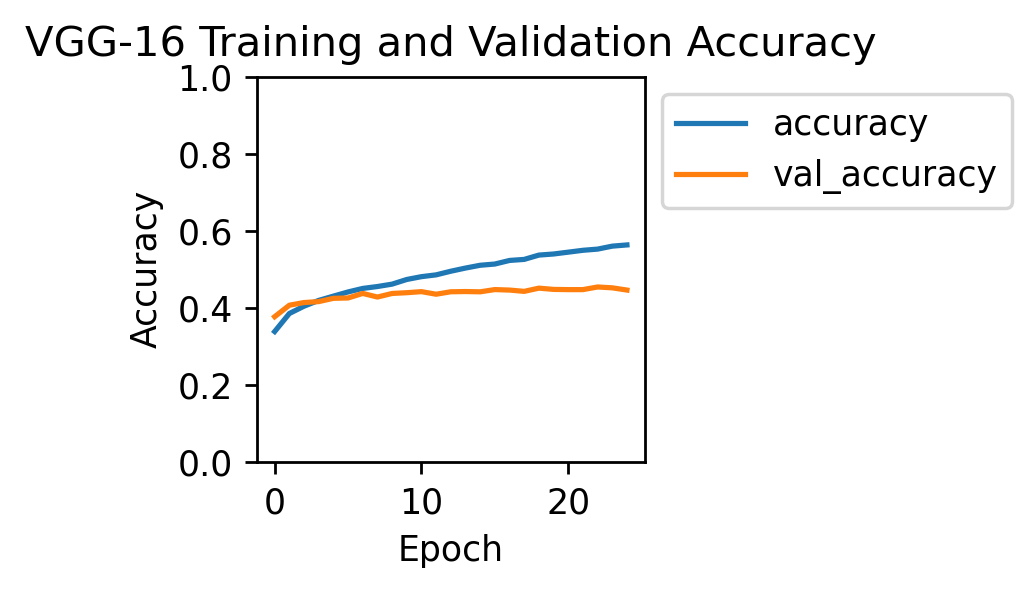

In [101]:
fig = plt.figure(figsize=(2,2), dpi=250)
plt.plot(history_vgg16.history['accuracy'], label='accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('VGG-16 Training and Validation Accuracy')


# 2.5 LeNet

In [102]:
# LeNet5 Model
model_LeNet = keras.Sequential()

model_LeNet.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model_LeNet.add(layers.AveragePooling2D())

model_LeNet.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model_LeNet.add(layers.AveragePooling2D())

model_LeNet.add(layers.Flatten())

model_LeNet.add(layers.Dense(units=120, activation='relu'))
model_LeNet.add(layers.Dense(units=84, activation='relu'))
model_LeNet.add(layers.Dense(units=10, activation = 'softmax'))

In [103]:
model_LeNet.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 46, 46, 6)         60        
                                                                 
 average_pooling2d_2 (Avera  (None, 23, 23, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 16)        880       
                                                                 
 average_pooling2d_3 (Avera  (None, 10, 10, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_29 (Dense)            (None, 120)             

In [104]:
model_LeNet.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'], run_eagerly=True)

In [105]:
history_LeNet = model_LeNet.fit(X_train_3D, y_train, epochs=25, 
                    validation_data=(X_test_3D, y_test))

Epoch 1/25
628/628 [==============================] - 24s 38ms/step - loss: 1.6361 - accuracy: 0.3601 - val_loss: 1.5330 - val_accuracy: 0.4125
Epoch 2/25
628/628 [==============================] - 24s 38ms/step - loss: 1.4407 - accuracy: 0.4468 - val_loss: 1.4282 - val_accuracy: 0.4490
Epoch 3/25
628/628 [==============================] - 23s 37ms/step - loss: 1.3319 - accuracy: 0.4896 - val_loss: 1.3804 - val_accuracy: 0.4751
Epoch 4/25
628/628 [==============================] - 23s 37ms/step - loss: 1.2399 - accuracy: 0.5319 - val_loss: 1.3350 - val_accuracy: 0.4929
Epoch 5/25
628/628 [==============================] - 23s 37ms/step - loss: 1.1500 - accuracy: 0.5665 - val_loss: 1.3433 - val_accuracy: 0.4929
Epoch 6/25
628/628 [==============================] - 25s 39ms/step - loss: 1.0594 - accuracy: 0.6025 - val_loss: 1.3365 - val_accuracy: 0.5006
Epoch 7/25
628/628 [==============================] - 25s 39ms/step - loss: 0.9649 - accuracy: 0.6418 - val_loss: 1.3966 - val_accuracy:

In [106]:
# Access the final accuracy from the history object
LeNet_train_accuracy = history_LeNet.history['accuracy'][-1]
Le_Net_val_accuracy = history_LeNet.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {LeNet_train_accuracy}")
print(f"Final Validation Accuracy: {Le_Net_val_accuracy}")

Final Training Accuracy: 0.9746218323707581
Final Validation Accuracy: 0.4874027669429779


Text(0.5, 1.0, 'LeNet Training and Validation Accuracy')

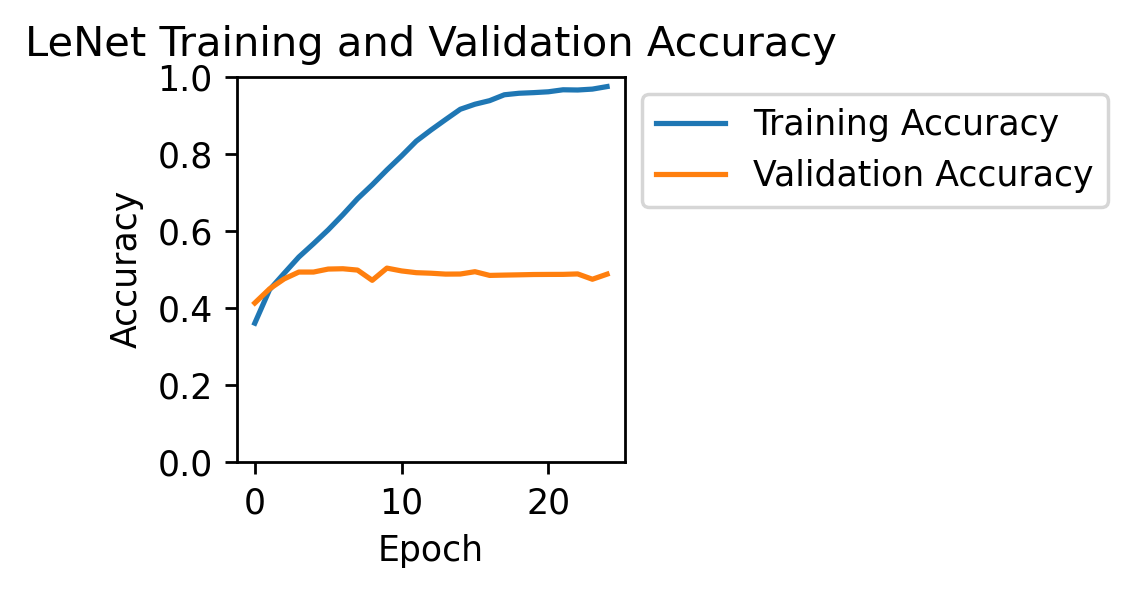

In [107]:
fig = plt.figure(figsize=(2,2), dpi=250)
plt.plot(history_LeNet.history['accuracy'], label='Training Accuracy')
plt.plot(history_LeNet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('LeNet Training and Validation Accuracy')

# 2.6 DenseNet

In [108]:
from keras.src.layers import GlobalAveragePooling2D
from keras.src.applications import DenseNet121

# Load the DenseNet121 model without the top layer (include_top=False)
DenseNet = DenseNet121(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Create a new model on top of the pre-trained DenseNet121 base model
model = Sequential()
model.add(DenseNet)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Assuming 7 classes for emotions

# Freeze the base model layers
DenseNet.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
DenseNet_history = model.fit(X_train_3D_RGB, y_train, epochs=25, validation_data=(X_test_3D_RGB, y_test))

Epoch 1/25
628/628 [==============================] - 67s 99ms/step - loss: 1.6091 - accuracy: 0.3814 - val_loss: 1.5914 - val_accuracy: 0.3867
Epoch 2/25
628/628 [==============================] - 60s 96ms/step - loss: 1.4759 - accuracy: 0.4339 - val_loss: 1.4941 - val_accuracy: 0.4215
Epoch 3/25
628/628 [==============================] - 62s 98ms/step - loss: 1.4251 - accuracy: 0.4539 - val_loss: 1.5042 - val_accuracy: 0.4269
Epoch 4/25
628/628 [==============================] - 60s 96ms/step - loss: 1.3815 - accuracy: 0.4761 - val_loss: 1.5126 - val_accuracy: 0.4216
Epoch 5/25
628/628 [==============================] - 60s 95ms/step - loss: 1.3301 - accuracy: 0.4953 - val_loss: 1.5040 - val_accuracy: 0.4428
Epoch 6/25
628/628 [==============================] - 60s 95ms/step - loss: 1.2841 - accuracy: 0.5133 - val_loss: 1.5098 - val_accuracy: 0.4376
Epoch 7/25
628/628 [==============================] - 60s 95ms/step - loss: 1.2293 - accuracy: 0.5379 - val_loss: 1.5543 - val_accuracy:

In [109]:
# Get the training and validation accuracy
densenet_train_accuracy = DenseNet_history.history['accuracy']
densenet_val_accuracy = DenseNet_history.history['val_accuracy']

# Get the training and validation loss
train_loss = DenseNet_history.history['loss']
val_loss = DenseNet_history.history['val_loss']

In [110]:
# Print the accuracy and loss values 
print("Training Accuracy:", densenet_train_accuracy[-1])  # Accuracy of the last epoch
print("Validation Accuracy:", densenet_val_accuracy[-1])  # Validation accuracy of the last epoch
print("Training Loss:", train_loss[-1])  # Loss of the last epoch
print("Validation Loss:", val_loss[-1])  # Validation loss of the last epoch

Training Accuracy: 0.8444466590881348
Validation Accuracy: 0.4336467981338501
Training Loss: 0.4436522424221039
Validation Loss: 2.5447404384613037


Text(0.5, 1.0, 'DenseNet Training and Validation Accuracy')

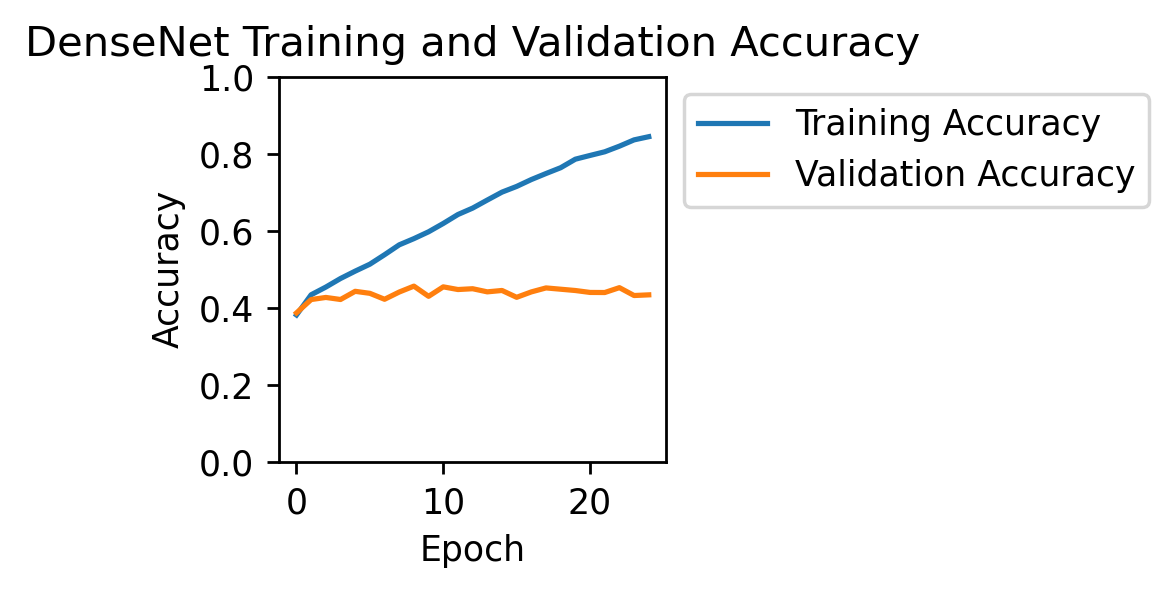

In [111]:
fig = plt.figure(figsize=(2,2), dpi=250)
plt.plot(densenet_train_accuracy, label='Training Accuracy')
plt.plot(densenet_val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('DenseNet Training and Validation Accuracy')

# 3 Final Results

Text(0.5, 1.0, 'Training and Validation Accuracy')

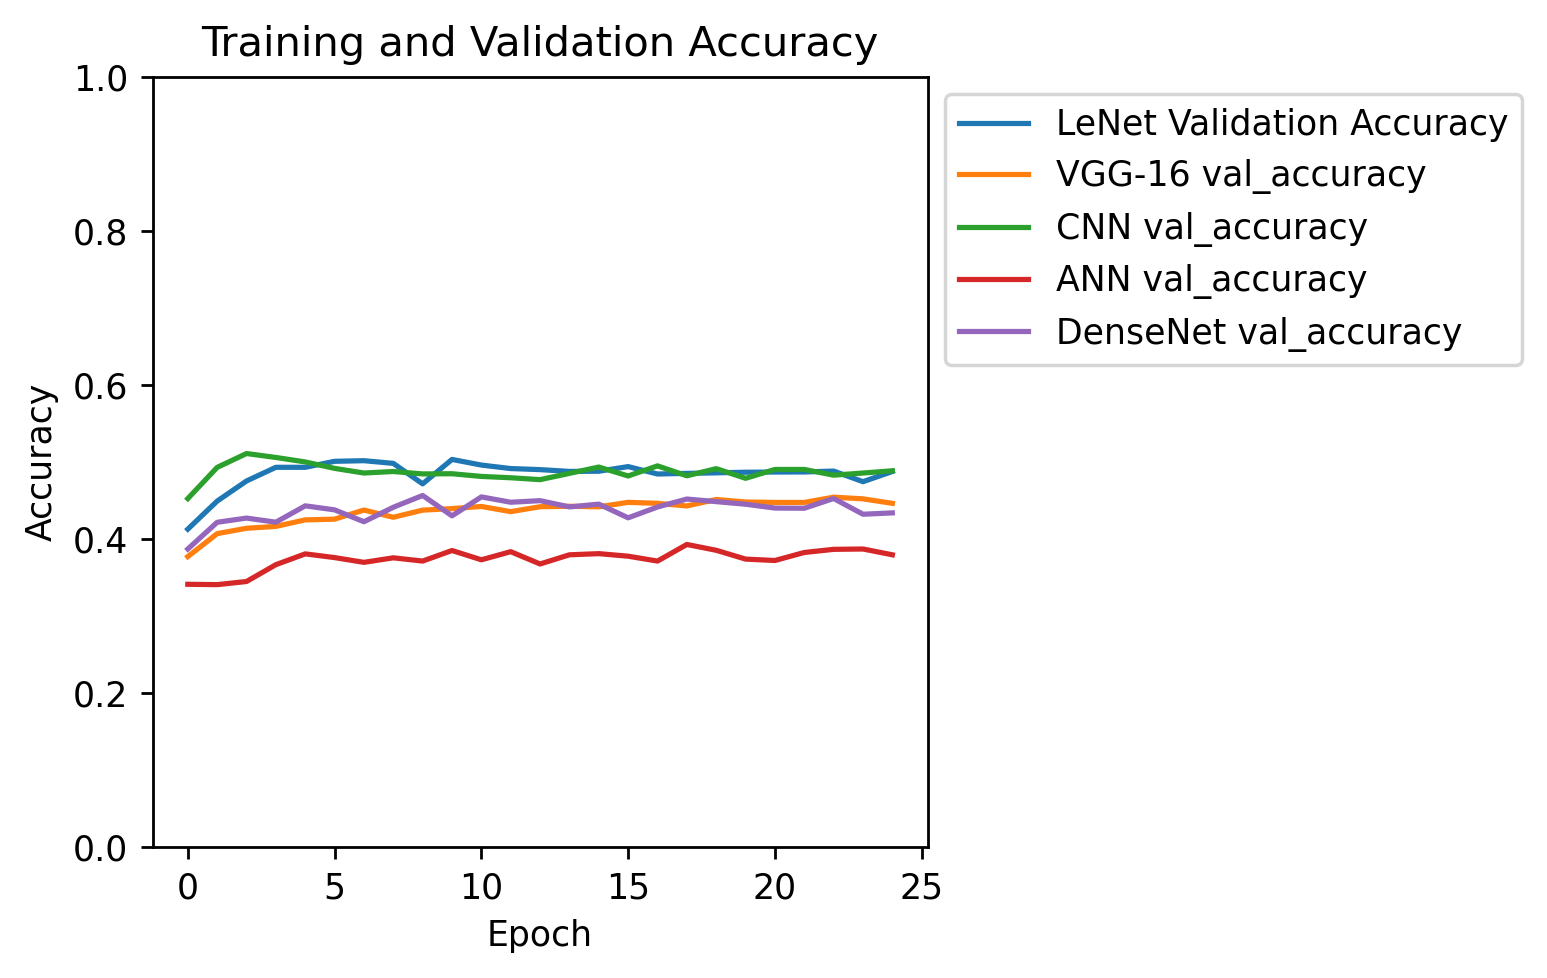

In [112]:
fig = plt.figure(figsize=(4,4), dpi=250)

plt.plot(history_LeNet.history['val_accuracy'], label='LeNet Validation Accuracy')

plt.plot(history_vgg16.history['val_accuracy'], label = 'VGG-16 val_accuracy')

plt.plot(history_cnn.history['val_accuracy'], label = 'CNN val_accuracy')

plt.plot(fitted_ANN_model.history['val_accuracy'], label = 'ANN val_accuracy')

plt.plot(DenseNet_history.history['val_accuracy'], label = 'DenseNet val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Training and Validation Accuracy')

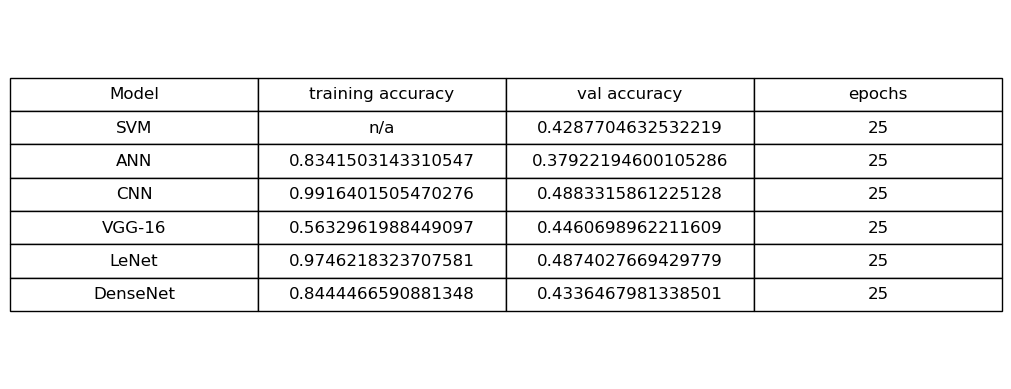

In [113]:
# Data for the table
data = [
    ['Model', 'training accuracy', 'val accuracy', 'epochs'],
    ['SVM', 'n/a', SVM_score, 25],
    ['ANN', ANN_train_accuracy, ANN_val_accuracy, 25],
    ['CNN', CNN_train_accuracy, CNN_val_accuracy, 25],
    ['VGG-16',VGG_train_accuracy, VGG_val_accuracy, 25],
    ['LeNet', LeNet_train_accuracy, Le_Net_val_accuracy, 25],
    ['DenseNet', densenet_train_accuracy[-1], densenet_val_accuracy[-1], 25]
]

# Create a figure and axes
fig, ax = plt.subplots()

# Hide axes
ax.axis('off')

# Create the table without column labels
table = ax.table(cellText=data, loc='center', cellLoc='center')

# Set font size
table.set_fontsize(14)

# Set table properties
table.scale(2, 2)  # Adjust scale as needed

# Show the table
plt.show()
